In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba # 分词
from wordcloud import WordCloud # 词云可视化
import matplotlib as mpl
from pyecharts import Geo # 地理图

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [4]:
data = pd.read_csv('E:\jupyter-notebook\data\LaGou.csv',encoding = 'gbk')
data.head(5) # 读取前五行

,岗位名,学历,工资,工作年限,公司福利,是否全职,公司全称,公司名字,公司代号,上市公司,公司城市,公司小区,岗位类型,公司人数
0,Python开发工程师,本科,8k-16k,1-3年,包三餐，年终奖，福利优厚,全职,北京汇行科技有限公司,妙计旅行,493225,B轮,北京,东城区,后端开发,150-500人
1,Python工程师,本科,20k-40k,1-3年,"技术驱动,极客氛围,大牛团队",全职,北京旷视科技有限公司,Face++,3093928,C轮,北京,海淀区,后端开发,500-2000人
2,Python开发工程师,本科,6k-8k,1-3年,"帅哥美女多,福利房,过节福利,环境好",全职,中至数据集团股份有限公司,中至科技,3718199,未融资,南昌,新建区,后端开发,150-500人
3,Python开发工程师,本科,10k-20k,1-3年,"AI,扁平化,弹性工作制,交通方便",全职,上海懿天网络科技有限公司,Versa,3545348,A轮,上海,长宁区,后端开发,15-50人
4,Python开发工程师,本科,6k-10k,1-3年,"周末双休,五险一金,带薪年假,福利多多",全职,重庆易宠科技有限公司,重庆易宠科技有限公司,4051476,B轮,重庆,渝北区,后端开发,150-500人


In [5]:
# Rs2=[] #建立存储分词的列表
# for i in range(len(data)):
#     result=[]
#     seg_list = jieba.cut(data[i])
#     for w in seg_list :#读取每一行分词
#         result.append(w)
#     Rs2.append(result)#将该行分词写入列表形式的总分词列表

# Rs2

In [6]:
data.sort_values('工作年限',ascending=False).tail(5) # 公司代号排序倒数五个

,岗位名,学历,工资,工作年限,公司福利,是否全职,公司全称,公司名字,公司代号,上市公司,公司城市,公司小区,岗位类型,公司人数
239,Python工程师,本科,15k-25k,1-3年,"免费三餐,弹性办公,办公室健身,靠谱团队",全职,北京乐动力网络科技有限公司,乐动力,3663846,A轮,北京,朝阳区,后端开发,50-150人
242,Python研发工程师,本科,10k-15k,1-3年,"五险一金,年终奖,土豪奖金,国内外旅游",全职,深圳市青柏信息科技有限公司,青柏信息,2866737,A轮,深圳,南山区,后端开发,50-150人
243,python开发工程师,本科,10k-20k,1-3年,平台成熟；薪酬福利好；技术氛围浓,全职,北京奇安信科技有限公司,360企业安全,3745051,不需要融资,北京,朝阳区,后端开发,2000人以上
247,Python工程师,本科,15k-25k,1-3年,弹性工作 年终奖 学习空间 高并发,全职,拉扎斯网络科技（上海）有限公司,饿了么,3307650,D轮及以上,上海,普陀区,后端开发,2000人以上
225,Python开发工程师,大专,10k-15k,1-3年,"晋升空间大,五险一金",全职,深圳市博奥特科技有限公司,博奥特科技,3773745,未融资,深圳,福田区,后端开发,150-500人


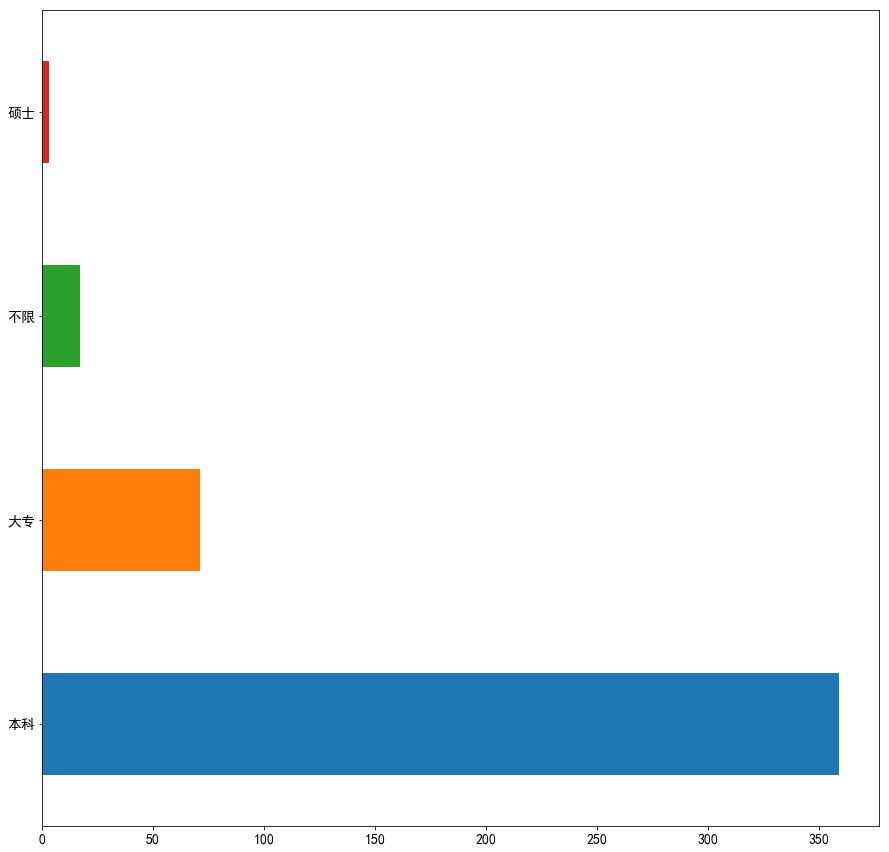

In [7]:
data['学历'].value_counts().plot(kind='barh',rot=0) # value_counts() 数据计数，.plot 画图，barh 柱状图(横),rot 旋转刻度
plt.show()

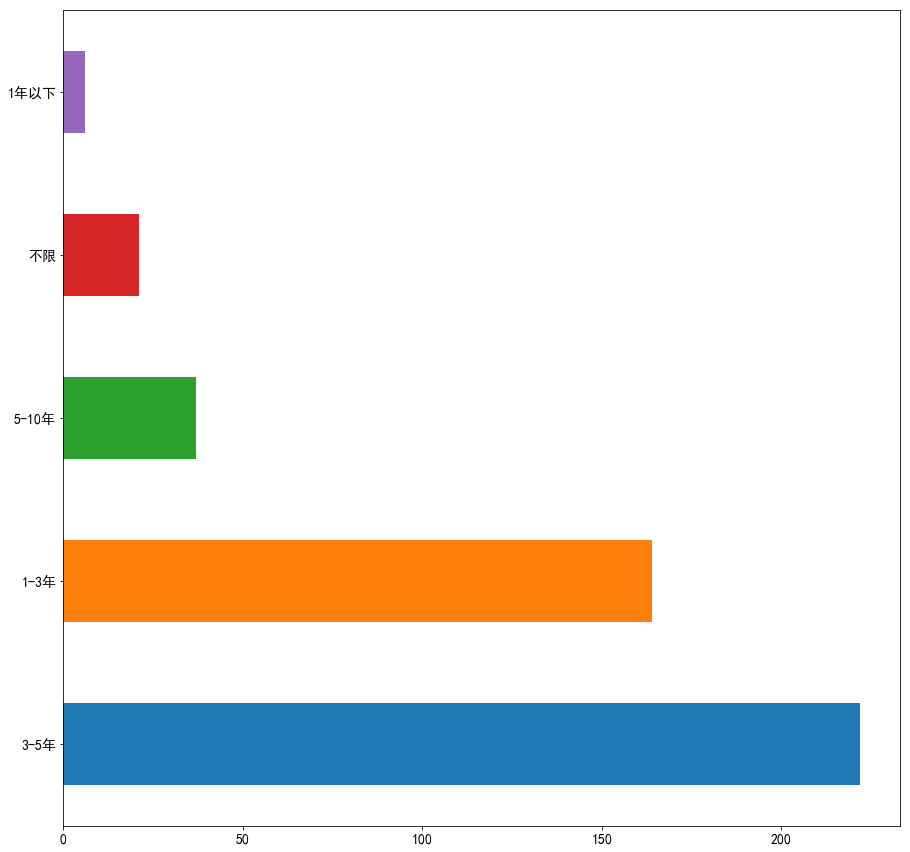

In [8]:
data['工作年限'].value_counts().plot(kind='barh',rot=0)
plt.show()

In [9]:
final = ''  
stopwords = ['PYTHON','python','Python','工程师','（','）','/'] # 停止词
for n in range(data.shape[0]):
    
    seg_list = list(jieba.cut(data['岗位名'][n]))
   
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
# final 得到的词汇

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\10406\AppData\Local\Temp\jieba.cache
Loading model cost 0.824 seconds.
Prefix dict has been built succesfully.


In [10]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font,                      
                     #设置背景色，默认为黑，可根据需要自定义为颜色
                      background_color='white', 
                    #允许最大词汇
                      max_words=400,
                    #最大号字体，如果不指定则为图像高度
                      max_font_size=50,
                    #画布宽度和高度，如果设置了msak则不会生效
                      width=200,
                      height = 150,
                      margin = 2,
                    #词语水平摆放的频率，默认为0.9.即竖直摆放的频率为0.1
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 199.5, 149.5, -0.5)

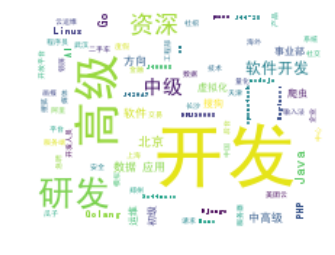

In [11]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [12]:
import jieba
words = jieba.lcut(final)
counts = {}
for word in words:
    if len(word) ==1:
        continue
    else:
        counts[word] = counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
for i in range(15):
    word,count = items[i]
    print("{0:<10}{1:>5}".format(word,count))

开发          251
高级           78
研发           42
资深           16
中级           11
软件开发          6
北京            4
Java          4
数据            4
Go            4
方向            3
软件            3
PHP           3
应用            3
中高级           3


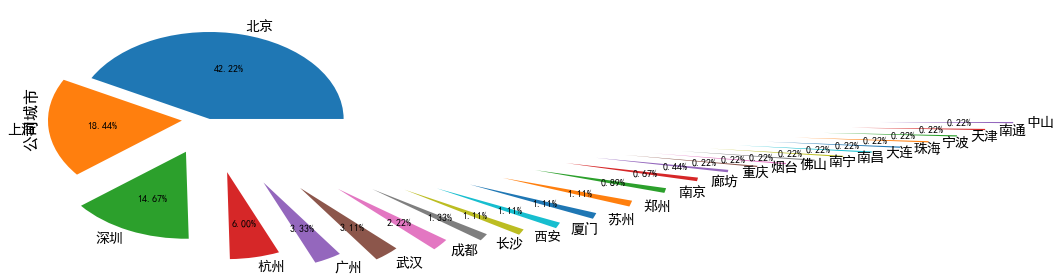

In [13]:
data['公司城市'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode = np.linspace(0,5,25)) # value_counts为对data每列中出现的数字进行统计
plt.show()

In [14]:
#提取数据框
data2 = list(map(lambda x:(data['公司城市'][x],eval(re.split('k|K',data['工资'][x])[0])*1000),range(len(data))))

In [15]:
# 提取价格信息
data3 = pd.DataFrame(data2)
data3

,0,1
0,北京,8000
1,北京,20000
2,南昌,6000
3,上海,10000
4,重庆,6000
5,大连,5000
6,武汉,8000
7,西安,15000
8,杭州,15000
9,北京,20000


In [16]:
#转化成Geo需要的格式
data4 = list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))
data4

[('上海', 14650.602409638554),
 ('中山', 8000.0),
 ('佛山', 10000.0),
 ('北京', 17531.57894736842),
 ('南京', 11000.0),
 ('南宁', 4000.0),
 ('南昌', 6000.0),
 ('南通', 6000.0),
 ('厦门', 9600.0),
 ('大连', 5000.0),
 ('天津', 10000.0),
 ('宁波', 10000.0),
 ('广州', 11400.0),
 ('廊坊', 8000.0),
 ('成都', 8700.0),
 ('杭州', 12555.555555555555),
 ('武汉', 10642.857142857143),
 ('深圳', 13484.848484848484),
 ('烟台', 5000.0),
 ('珠海', 10000.0),
 ('苏州', 11800.0),
 ('西安', 10000.0),
 ('郑州', 9800.0),
 ('重庆', 7000.0),
 ('长沙', 6833.333333333333)]

In [29]:
# 地理位置展示
geo = Geo("全国Python工资布局","制作人:未昔",title_color="#fff",title_pos="left",width=1200,height=600,background_color='#404a59')
attr, value = geo.cast(data4)
geo.add("", attr, value, type="heatmap", is_visualmap=True, visual_range=[0,300], visual_text_color='#fff')

In [30]:
# 中国地图Python工资，此分布是最低薪资
geo

In [ ]:
# import tushare as ts

# df = ts.profit_data(top=60)
# df.sort_values('公司代号',ascending=False)